# Sistema de Recomendação para Jogos da Steam
Vamos analisar um conjuntos de dados relacionados com a plataforma de jogos Steam, podemos dividir em duas partes esse projeto, na primeira fazer uma breve analise dos dados para entender melhor como estão distribuidos e na segunda parte vamos desenvolver um algoritmo de machine learning para recomendar um jogo baseado no historico de jogos ou em algum jogo especifico.

Nosso conjunto de Dados contém:
1. **AppID**-            o numero do ID do jogo na Steam (numérico)
2. **Name**-             o nome do jogo (string)
3. **Release_data**-     a data de lançamento do Jogo (date)
4. **English**-          se o jogo é Ingles, sendo 0 = não e 1 = sim
5. **Developer**-        a empresa que desenvolveu o jogo (string)
6. **Publisher**-        quem publicou o jogo (string)
7. **platforms**-        as plataforma uqe o jogo roda, sendo windowns, mac e linux
8. **required_age**-     Idade minima para jogar
9. **categories**-       A categoria em que o jogo se enquadra, podendo ser mais de um separado por ; (string)  
10. **Genres**-           os gêneros dos jogos, podendo ser mais de um genero separado por ; (string)
11. **steamspy_tags**-    São as tags quando o jogo é postado na Steam,podendo ter mais de uma ; (string)     
12. **achievements**-     a quantidade de conquista que é possivel conseguir dentro do jogo (numérico)
13. **positive_ratings**- Classificações Positivas do Jogo (numérico)   
14. **negative_ratings**- Classificações Negativa do Jogo  (numérico)   
15. **average_playtime**- média de tempo jogado (numérico)
16. **median_playtime**-  mediana do tempo jogado (numérico)   
17. **owners**-           Intervalo do numero de proprietarios (numérico)
18. **price**-            Valor do jogo em dolares (numérico)

Vamos importar todas as biblioteca importante para analise dos dados.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
C:\Users\gusta\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
Data_Steam = pd.read_csv('steam.csv')

Apenas dando uma olhada como está o conjunto de dados inicialmente.

In [3]:
Data_Steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


Nenhum missing value, então não precisamos nos preocupar com isso.

In [4]:
Data_Steam.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

A unica coluna que nãp está realmente de acordo é a de idade, podemos perceber que a maioria dos valores é zero. Podemos notar que existem jogos de graça e até 420 dolares, porém ficando com jogos em torno de 10 dolarés. As availações e o tempo de jogo (media e mediana) tem uma alta variabilidade pela Steam aceitar de desenvolvedores iniciantes que produzem jogos curtos até produtores maiores com jogos longos.

In [5]:
Data_Steam.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [6]:
#Data_Steam.drop(['appid','english','required_age','publisher','achievements','platforms','owners'],axis = 1, inplace = True)

# Per Genres and categories

Utilizando a função get_dummies, conseguimos dividir o genero e a categoria e contabilizar quantos jogos para cada tipo.

Podemos ver que os jogos Indie são os maiores, com quase o dobro do segundo genero (de ação), as caracteristicas do jogo Indie mostra que existem muitos produtores independentes, podendo trazer elementos ineditos ou não, dentro da cena de jogos, relacionado com isso temos que a maior categoria é de single-player que em seguida encontra a Steam Achievements que é uma categoria inserida pela steam para os jogadores se empenharem mais dentro dos jogos.

Os generos com menores jogos presentes, estão altamente relacionados com aprendizado de alguma area, como tutorial, documentario, edição de fotos eentre outros. Assim como nas categorias podemos notar que o suporte de VR esta embaixo, porem como estamo trabalhando até a data de 2019, podendo ser diferente hoje em dia.

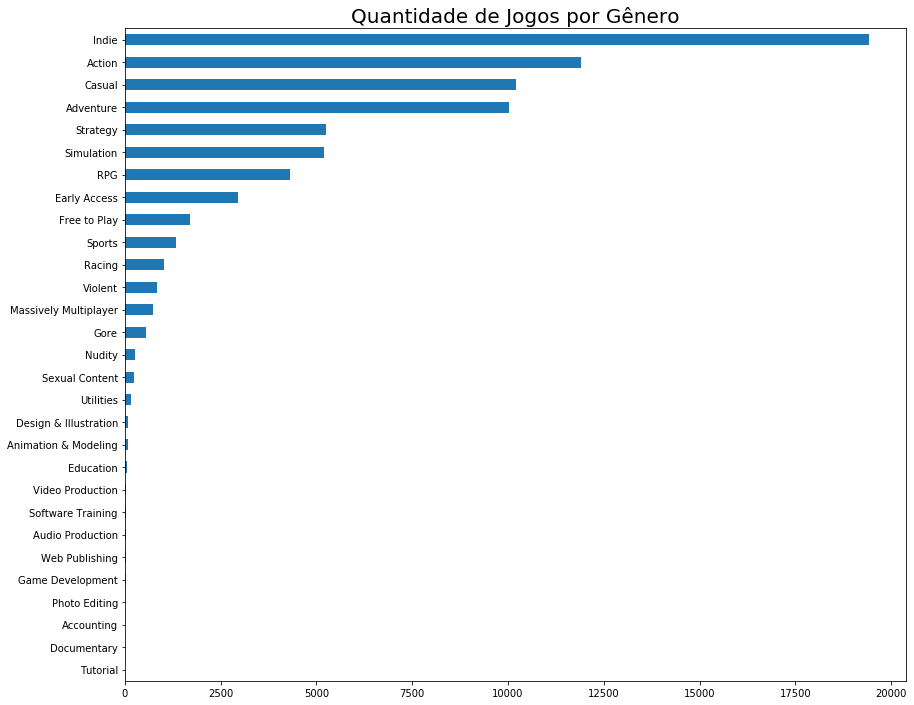

In [67]:
total_games_por_genero = Data_Steam.genres.str.get_dummies(";").sum()
total_games_por_genero.sort_values().plot.barh(figsize = (14,12));
plt.title('Quantidade de Jogos por Gênero',size = 20);


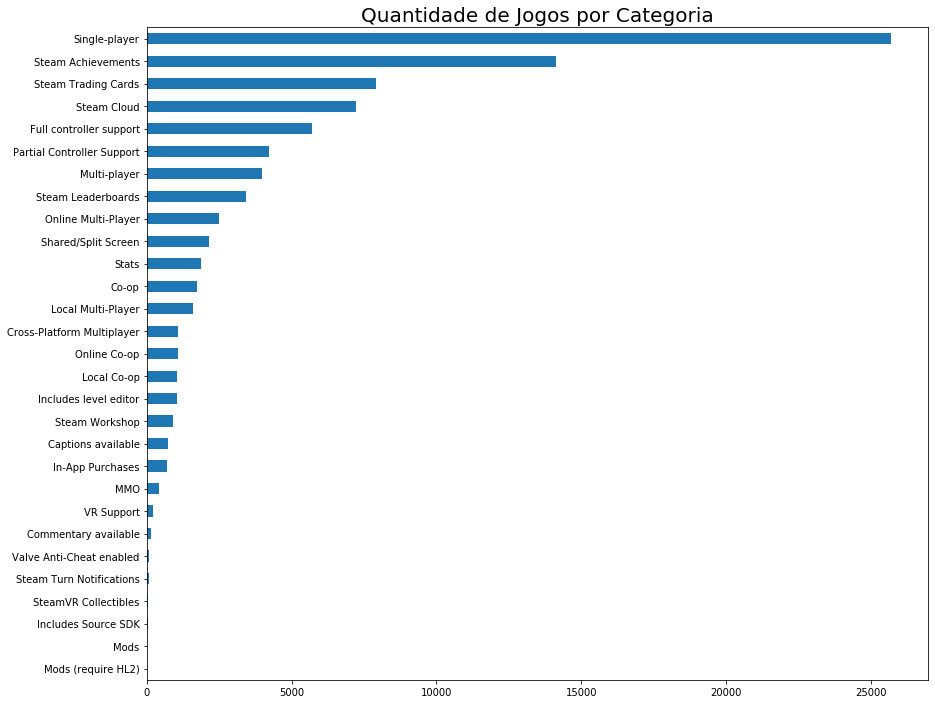

In [68]:
total_games_por_cate = Data_Steam.categories.str.get_dummies(";").sum()
total_games_por_cate.sort_values().plot.barh(figsize = (14,12));
plt.title('Quantidade de Jogos por Categoria',size = 20);

Quando usamos o get_dummies ele cria uma nova matriz esparsa de zeros e um's com os generos e categorias presentes, com isso retiramos as colunas genres e categories por essas duas matrizes esparsas, criando uma nova matriz.

In [9]:
New_data = pd.concat([Data_Steam,Data_Steam.genres.str.get_dummies(";")],axis=1)
New_data = New_data.drop('genres', axis = 1)

New_data = pd.concat([New_data,Data_Steam.categories.str.get_dummies(";")],axis=1)
New_data = New_data.drop('categories', axis = 1)

In [10]:
Name_genres = Data_Steam.genres.str.get_dummies(";").columns
Name_cat = Data_Steam.categories.str.get_dummies(";").columns


Vamos analisar o preço dos jogos por genero, para isso vamos descosiderar os jogos que são de graça e vamos fazer a media, mediana e desvio padrão dos generos e categorias. Alem disso pegamos as avaliações negativas e positivas.

Podemos ver que os jogos Indie tem os menores preços, por serem produzidos por desenvolvedores independentes, mas podemos ver que a media da maioria dos jogos estão abaixo dos 20 dolares, para uma noção de valores um jogo famoso que vai ser lançamento geralmente o preço maximo é de 60 dalores. Quando olhamos para jogos de desenvolvimento pessoal são os mais expensivos. Dentro das categorias temos uma menor variação indo de 17.5 até 7.5, sendo bem mais acessíveis.

In [11]:
Data_withou_freePrice = New_data.query('price > 0 ')

In [12]:
Price_per_genre = []
Std_Price_per_genre = []
PosRat_per_genre = []
NegRat_per_genre = []
Median_per_genre = []

for gen in Name_genres:
   Price_per_genre.append(Data_withou_freePrice.groupby([gen])['price'].mean()[1])
   Std_Price_per_genre.append(Data_withou_freePrice.groupby([gen])['price'].agg(np.std)[1])
   PosRat_per_genre.append(Data_withou_freePrice.groupby([gen])['positive_ratings'].mean()[1])
   NegRat_per_genre.append(Data_withou_freePrice.groupby([gen])['negative_ratings'].mean()[1])
   Median_per_genre.append(Data_withou_freePrice.groupby([gen])['median_playtime'].mean()[1])

Price_per_cat = []
Std_Price_per_cat =[]
PosRat_per_cat = []
NegRat_per_cat = []
Median_per_cat = []

for cat in Name_cat:
    if len(Data_withou_freePrice.groupby([cat])['price'].mean()) == 2:
        Price_per_cat.append(Data_withou_freePrice.groupby([cat])['price'].mean()[1])
        Std_Price_per_cat.append(Data_withou_freePrice.groupby([cat])['price'].agg(np.std)[1])
        PosRat_per_cat.append(Data_withou_freePrice.groupby([cat])['positive_ratings'].mean()[1])
        NegRat_per_cat.append(Data_withou_freePrice.groupby([cat])['negative_ratings'].mean()[1])
        Median_per_cat.append(Data_withou_freePrice.groupby([cat])['median_playtime'].mean()[1])
    else:
        Price_per_cat.append(0)
        Std_Price_per_cat.append(0)
        PosRat_per_cat.append(0)
        NegRat_per_cat.append(0)
        Median_per_cat.append(0)
        
Genre_Data = pd.DataFrame([Price_per_genre,Std_Price_per_genre])
Genre_Data = Genre_Data.rename(index = {0 : 'Media',1:'STD'})
Genre_Data.columns = Name_genres
Genre_Data = Genre_Data.T
Genre_Data = Genre_Data.fillna(0)

Cat_Data = pd.DataFrame([Price_per_cat,Std_Price_per_cat])
Cat_Data = Cat_Data.rename(index = {0 : 'Media',1:'STD'})
Cat_Data.columns = Name_genres
Cat_Data = Cat_Data.T
Cat_Data = Cat_Data.fillna(0)   

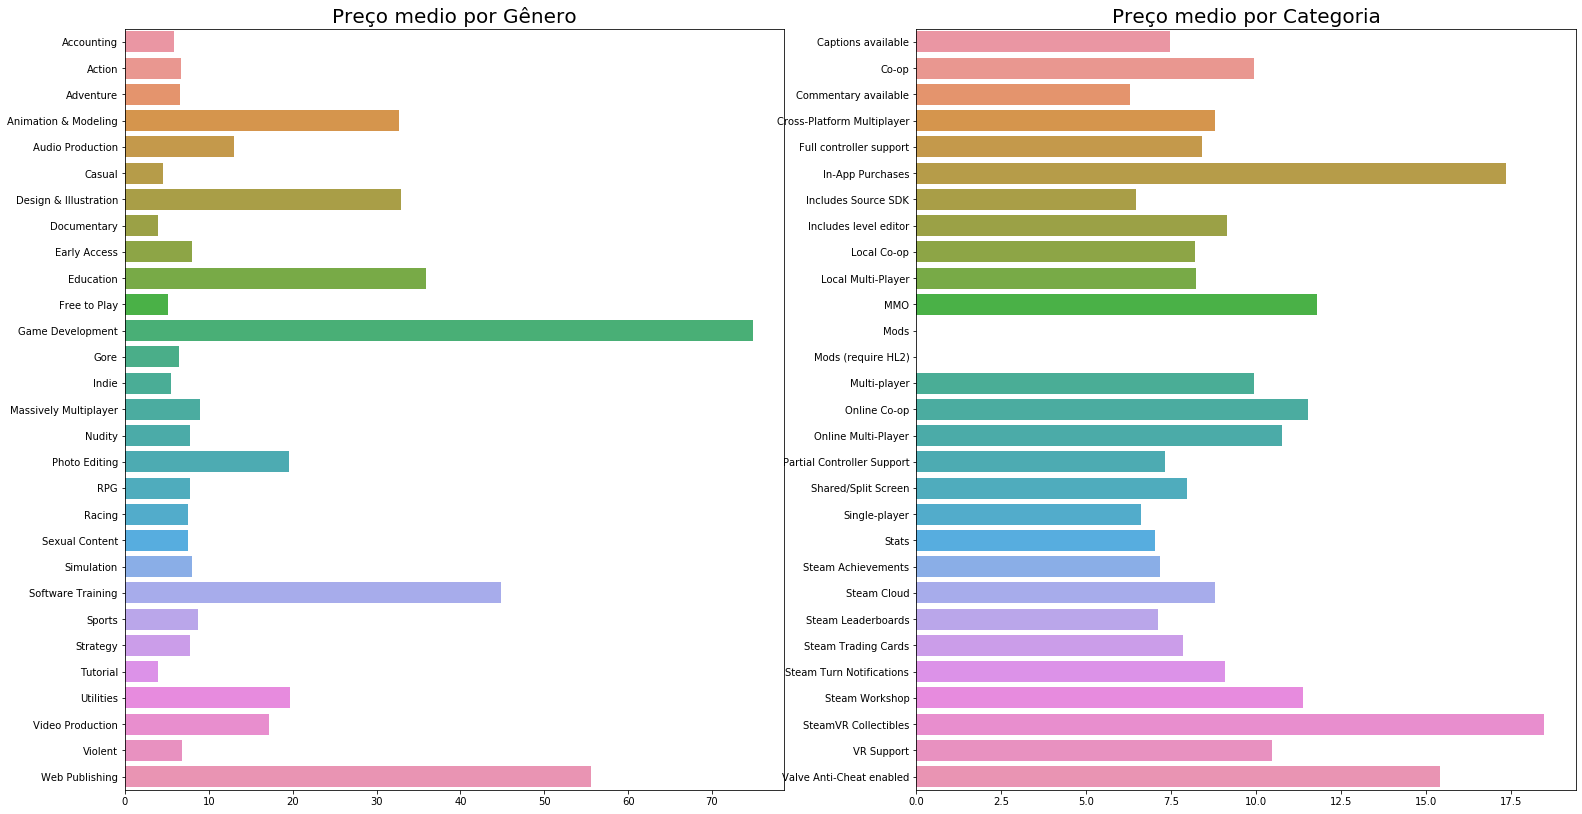

In [71]:
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

f, (ax1,ax2) = plt.subplots(1,2,figsize=(26, 14))

sns.barplot(x = Price_per_genre, y = Name_genres, ax = ax1);
ax1.set_title('Preço medio por Gênero',size = 20);
sns.barplot(x = Price_per_cat, y = Name_cat, ax = ax2);
ax2.set_title('Preço medio por Categoria',size = 20);

Foi feito o grafico das medianas do tempo jogado, a mediana é o valor que separa a parte superios da parte inferior dos valores. Podemos ver que os jogos com mais tempo jogados são Massivly Multiplayer e curiosamente photo Editing, nas demais categorias conseguimos ver uma variação entre 50 e 200 horas. Porém quando olhamos as categorias, disparado MMO tem o maior tempo jogado e as demais variando entre si. Vale ressaltar que jogos do tipo MMO não tem uma historia para percorrer e sim um jogo que se repete apenas mudando o personagem jogado, por isso um maior tempo.

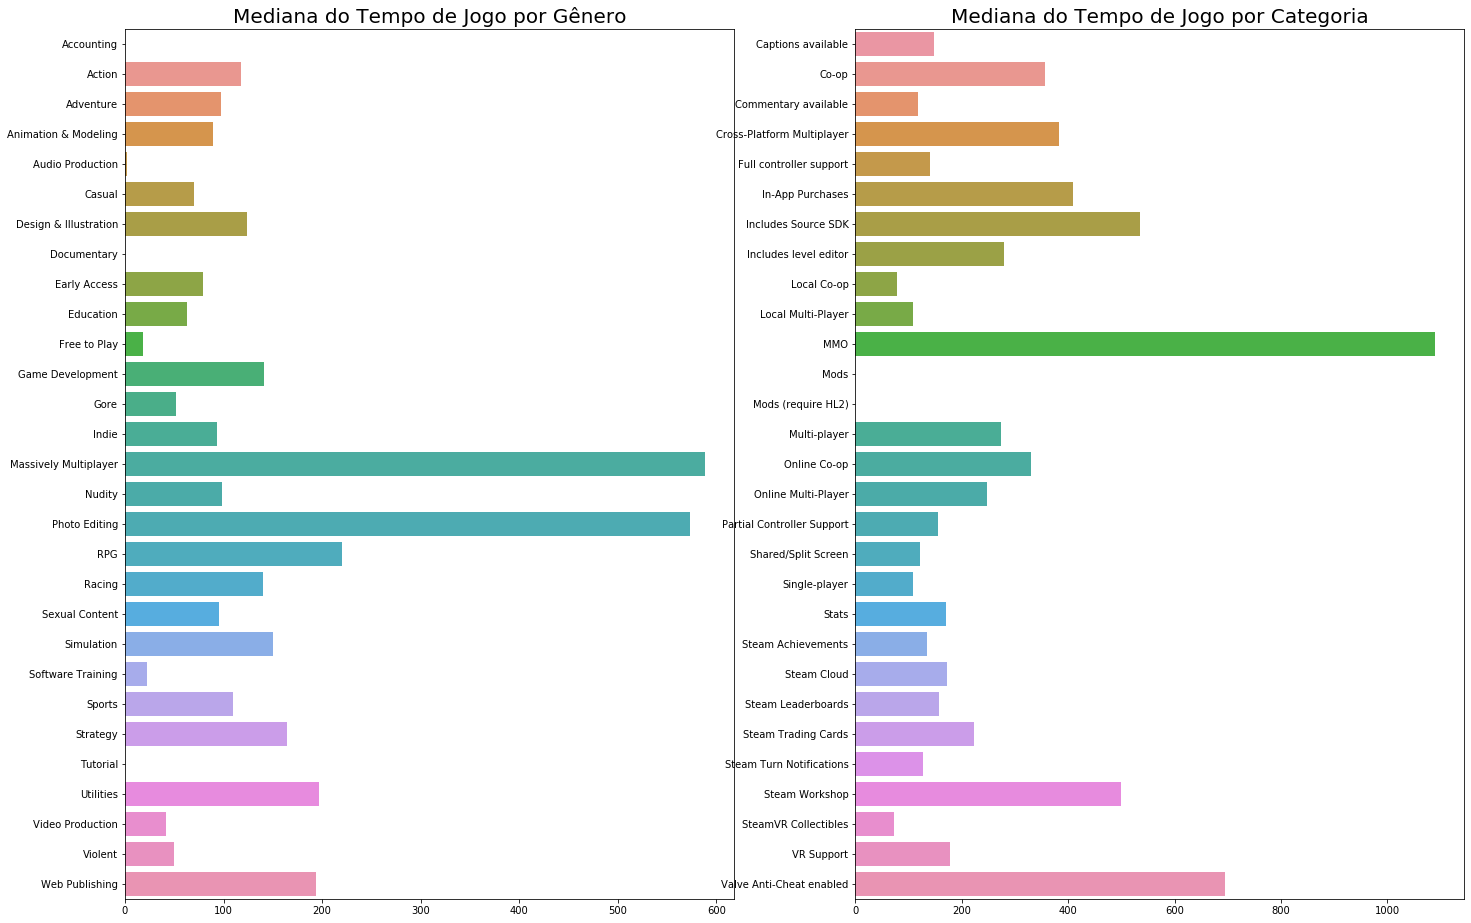

In [72]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(24, 16))

sns.barplot(x = Median_per_genre, y = Name_genres, ax = ax1);
ax1.set_title('Mediana do Tempo de Jogo por Gênero',size = 20);
sns.barplot(x = Median_per_cat, y = Name_cat, ax = ax2);
ax2.set_title('Mediana do Tempo de Jogo por Categoria',size = 20);

# Ratings

Dando uma olhada nas avaliações positiva e negativas, a maioria dos generos recebem mais avaliações positivas do que negativas, menos que 10% da quantidade de avaliações totais são negativa. Porém temos uma exceção que é Massivly Multiplayer que é a sigla para (MM), que tem muito proximos avaliações negativas e positivas, isso se da por ter um maior tempo jogado, as pessoas gostam mais porem se frustam mais ao mesmo tempo.

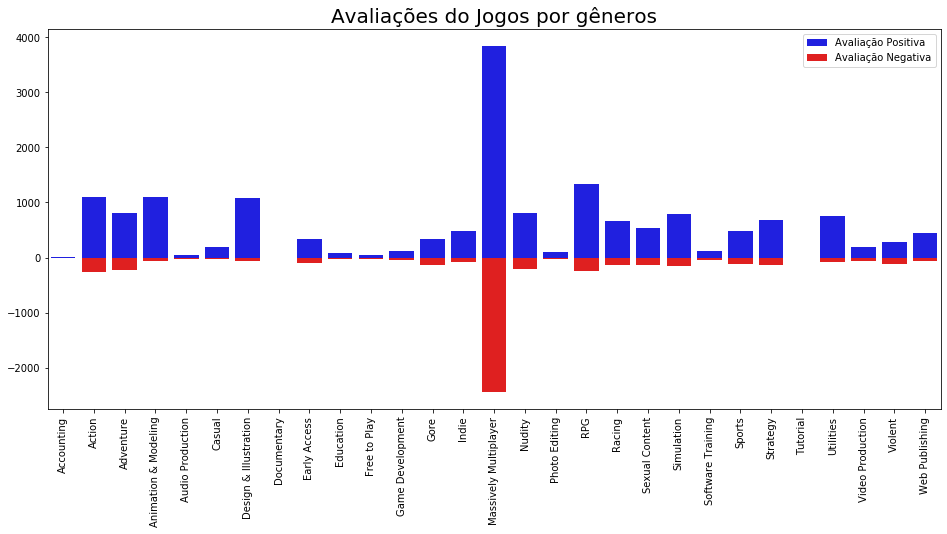

In [63]:
NegRat_per_genre = [-1*x for x in NegRat_per_genre]
#sns.barplot(x = Price_per_genre, y = Name_cat);
f = plt.figure(figsize=(16, 7))

sns.barplot(x = Name_genres, y = PosRat_per_genre, color = 'blue',label = 'Avaliação Positiva');
sns.barplot(x = Name_genres, y = NegRat_per_genre, color = 'red',label = 'Avaliação Negativa');

plt.legend()
plt.title("Avaliações do Jogos por gêneros",size = 20)
plt.xticks(rotation=90);

Criamos uma avaliação para os jogos que é simplestemente as avaliações positivas dividido pelas asvaliações totais. Plotando os 5 primeiros jogos com maiores avaliações positivas e negativas, 3 jogos (Counter Strike (CS), PlayerUnkown's BattleGround (PUBG) e Dota 2), onde Dota 2 e PUBG tem valores proximos das avaliações de positiva e negativa e o CS com maior avaliação positiva possivel.

In [16]:
Data_Steam['Percentage_of_positive_ratings'] = (Data_Steam.positive_ratings.values/(Data_Steam.positive_ratings.values + Data_Steam.negative_ratings.values))*100
New_data['Percentage_of_positive_ratings'] = (New_data.positive_ratings.values/(New_data.positive_ratings.values + New_data.negative_ratings.values))*100

In [17]:
Five_positive_rating = Data_Steam.sort_values('positive_ratings',ascending=False).reset_index().loc[0:4,:]
Five_negative_rating = Data_Steam.sort_values('negative_ratings',ascending=False).reset_index().loc[0:4,:]

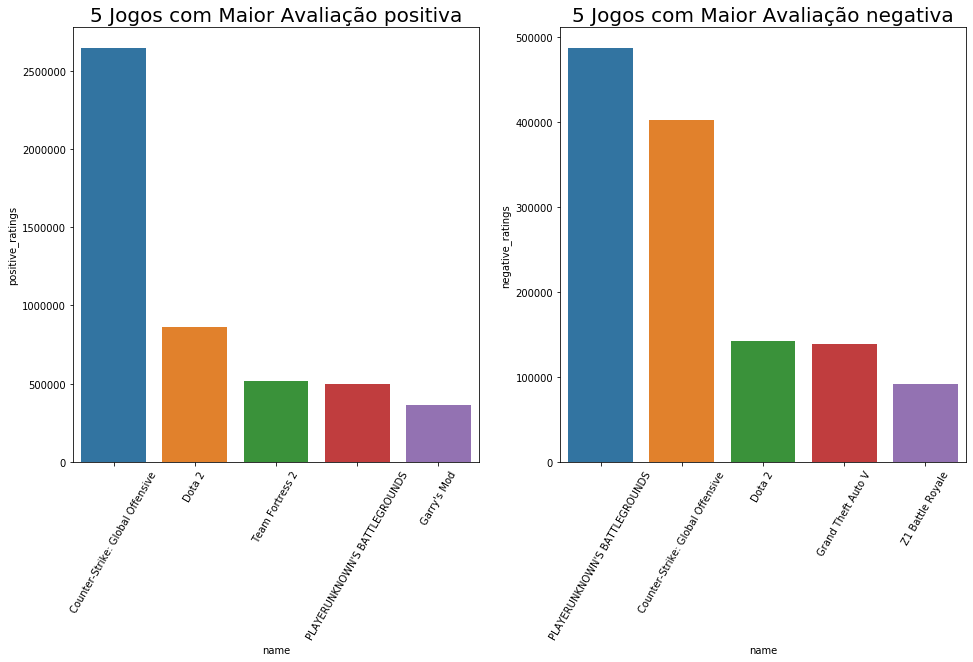

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8));

sns.barplot(x ='name' ,y = 'positive_ratings', data = Five_positive_rating, ax = ax1);

sns.barplot(x ='name' ,y = 'negative_ratings', data = Five_negative_rating, ax = ax2);
#plt.xticks(rotation=90);
ax1.set_title('5 Jogos com Maior Avaliação positiva',size = 20);
ax2.set_title('5 Jogos com Maior Avaliação negativa',size = 20);

plt.setp(ax1.get_xticklabels(), rotation=60);
plt.setp(ax2.get_xticklabels(), rotation=60);

Com essa nova avaliação podemos plotar os 5 primeiros jogos, e são diferentes dos vistos anteriomente, porém se olharmos existem jogos que não receberam avaliações negativas, por isso vamos refazer o grafico só que agora pegamos avaliações acima de 100 valores. Notamos que o jogo com a menor avaliação chega ser 12.5% enquanto os cinco maiores ficaram na casa dos 90%.

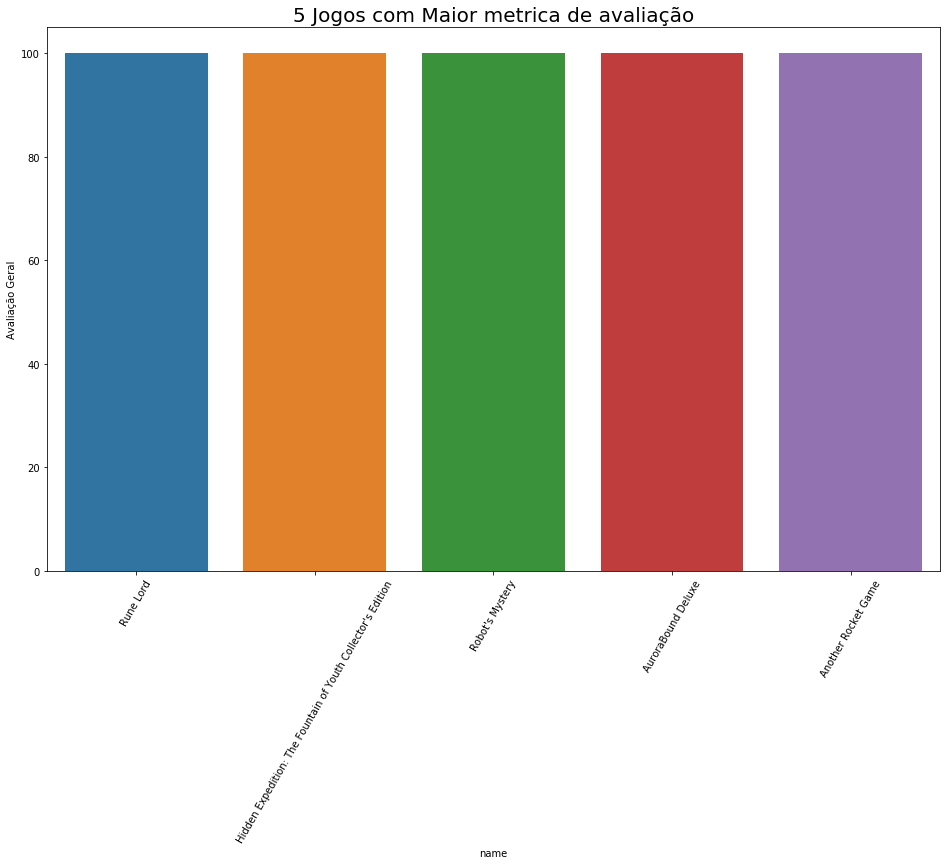

In [74]:
Five_rating = Data_Steam.sort_values('Percentage_of_positive_ratings',ascending=False).reset_index().loc[0:4,:]

fig = plt.figure(figsize = (16,10))
sns.barplot(x ='name' ,y = 'Percentage_of_positive_ratings', data = Five_rating);

plt.title('5 Jogos com Maior metrica de avaliação',size = 20);
plt.ylabel("Avaliação Geral")
plt.xticks(rotation=60);

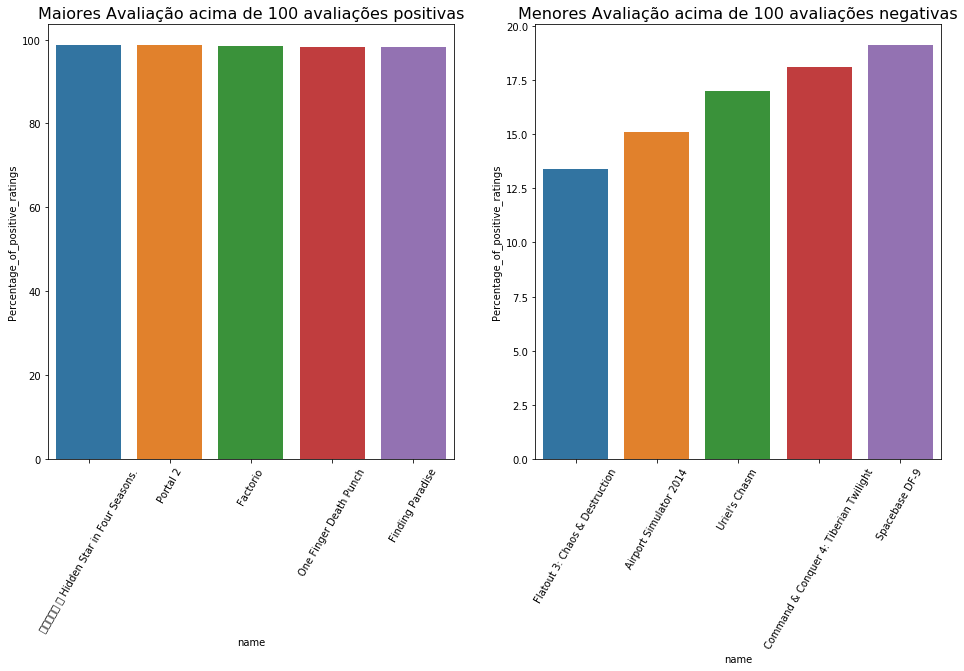

In [79]:
Data_Steam2 = Data_Steam.query('positive_ratings  > 100 & negative_ratings > 50');
#Data_Steam2 = Data_Steam2.query('negative_ratings > 100');

Five_percentage_rating = Data_Steam2.sort_values('Percentage_of_positive_ratings',ascending=False).reset_index().loc[0:4,:];
Five_percentage_negrating = Data_Steam2.sort_values('Percentage_of_positive_ratings',ascending=True).reset_index().loc[0:4,:];

import matplotlib.pyplot as plt
%matplotlib inline
f, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8));

sns.barplot(x ='name' ,y = 'Percentage_of_positive_ratings', data = Five_percentage_rating, ax = ax1);

sns.barplot(x ='name' ,y = 'Percentage_of_positive_ratings', data = Five_percentage_negrating, ax = ax2);
#plt.xticks(rotation=90);
ax1.set_title('Maiores Avaliação acima de 100 avaliações positivas',size = 16);
ax2.set_title('Menores Avaliação acima de 100 avaliações negativas',size = 16);

plt.setp(ax1.get_xticklabels(), rotation=60);
plt.setp(ax2.get_xticklabels(), rotation=60);

# DEVELOPERS

Vamos dar uma olhada no produtores relacionado na quantidade de jogos que eles tem presentes nessa banco de dados, a media das avaliações e na media do preço do seus jogos, utilizando o conjunto de dados com avaliações positivas e negativas maiores de 100 e para constar que utilizei a coluna english apenas para fazer a contagem, mas ela não foi considerada.

Nosso conjunto novo esta ordenado em relação a quantidade de jogos, podemos ver que a porcentagem das avaliações gira em torno de 70% até 90% empresas positivas, contraponto que os preços vao de 4 dolares até 40dolares

In [21]:
pv = Data_Steam2.pivot_table(index='developer', 
                   values=['english', 'price','Percentage_of_positive_ratings'], 
                   aggfunc={'english':'count', 'price':np.mean,'Percentage_of_positive_ratings':np.mean})

pv = pv.rename({'english':'Quantidade_de_Jogos'}, axis=1).sort_values(by='Quantidade_de_Jogos', ascending=False)

pv.head(10)

,Percentage_of_positive_ratings,Quantidade_de_Jogos,price
developer,,,
"KOEI TECMO GAMES CO., LTD.",71.782068,29,40.370000
Valve,89.077860,26,4.593077
Square Enix,74.926723,22,15.876818
Daedalic Entertainment,84.276181,17,17.784118
Ubisoft Montreal,79.503949,17,12.931176
Milestone S.r.l.,69.557126,17,23.072353
id Software,86.254737,16,6.491875
Just1337 Studio,75.636116,14,5.418571
Double Fine Productions,80.743106,14,10.304286


Agora retirando as companhias com menos 10 jogos dentro da Steam, podemos fazer o pairplot para ver como esta a disposição dos ponto. Podemos ver que o preço tem alguma relação com as outras duas colunas, podemos ver pelos graficos formando uma correlação baixa, e abaixo conseguimos realmente ver se existe fazendo a correlação da tabela, e tem uma correlação negativa de 0.36, isso quer dizer que quanto maior o preço menor vai ser a avaliação do jogo (não tão forte) e as demais colunas não existe isso.

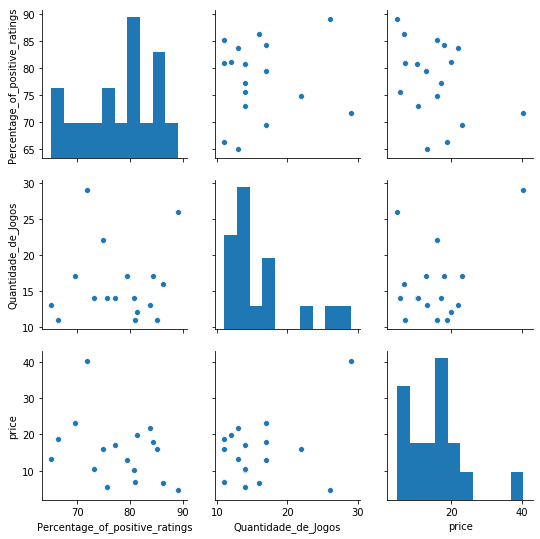

In [22]:
More_than_10 = pv.query('Quantidade_de_Jogos > 10')
sns.pairplot(More_than_10);

In [23]:
More_than_10.corr()

,Percentage_of_positive_ratings,Quantidade_de_Jogos,price
Percentage_of_positive_ratings,1.000000,0.063803,-0.361939
Quantidade_de_Jogos,0.063803,1.000000,0.357596
price,-0.361939,0.357596,1.000000


Podemos ver algumas empresas famosas e que estão na parte de cima da tabela, quais são os generos contidos no nosso conjunto de dados. Uma ideia que é possivel desenvolver é qual o genêro de jogo que uma empresa especifico vai lançar, utilizando a probabilidade com os dados que temos.

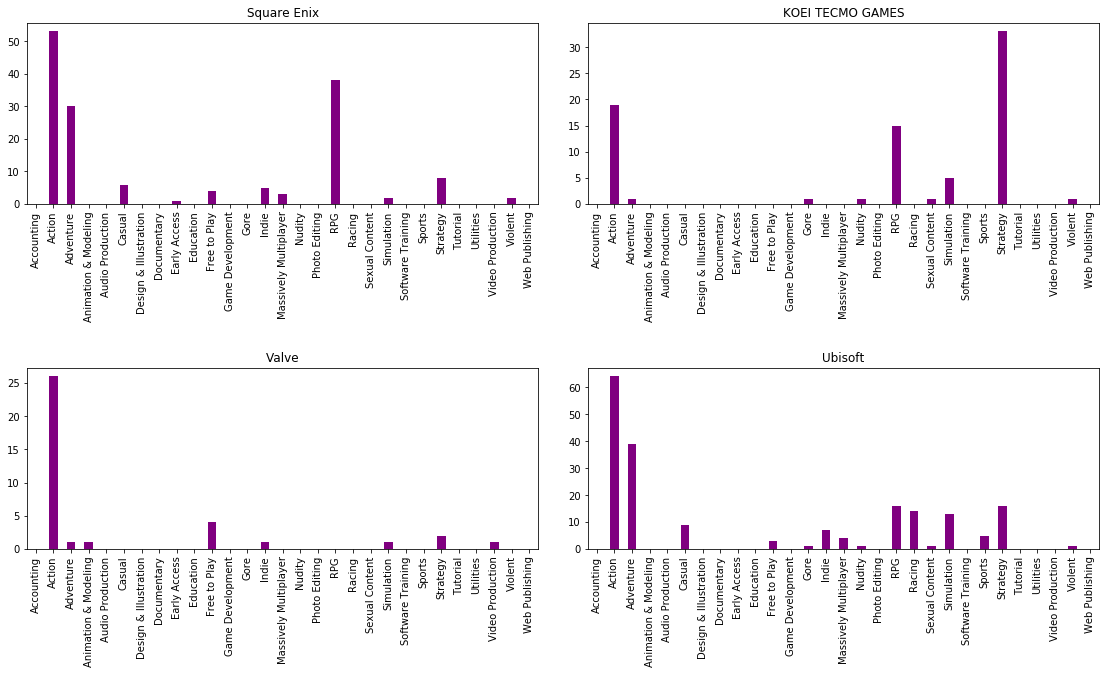

In [24]:
f , axi = plt.subplots(2,2, figsize = (16,10))

New_data[New_data.publisher == 'Square Enix'][Name_genres].sum().plot.bar(color='purple', ax = axi[0,0], title = 'Square Enix')
New_data[New_data.publisher == 'KOEI TECMO GAMES CO., LTD.'][Name_genres].sum().plot.bar(color='purple', ax = axi[0,1], title = 'KOEI TECMO GAMES')
New_data[New_data.publisher == 'Valve'][Name_genres].sum().plot.bar(color='purple', ax = axi[1,0], title = 'Valve')
New_data[New_data.publisher == 'Ubisoft'][Name_genres].sum().plot.bar(color='purple',ax= axi[1,1], title = 'Ubisoft');

f.tight_layout(pad=3.0)

# Per Time

Agora vamos separar nosso conjunto por ano, para ver como foi a evolução das medias e a soma dos preços, e ver qual foi o crescimento do 4 maiores generos de jogos sendo ação, RPG, Simulation e Indie.

Podemos ver o crescimento da media do preço dos jogos depois do ano de 2008, tendo seu pico no ano de 2015. A soma tambem começa a aumentar depois do de 2012, o motivo foi o aumento de jogos e pessoas interessadas em diferentes formas de jogar. A steam hoje em dia é a maior plataforma para baixar jogos, dando uma maior visibilidade para jogos independentes.

In [25]:
import datetime
Data_withou_freePrice['release_date'] =  pd.to_datetime(Data_withou_freePrice['release_date'], format='%Y-%m-%d')
Data_withou_freePrice['appid'] = np.repeat(1, Data_withou_freePrice.shape[0])
Data_withou_freePrice.index = Data_withou_freePrice['release_date']

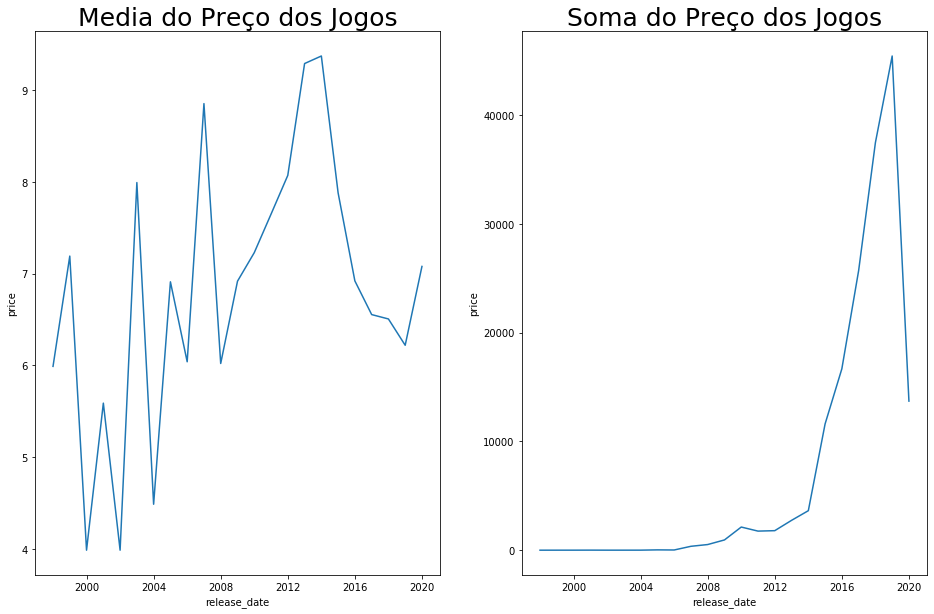

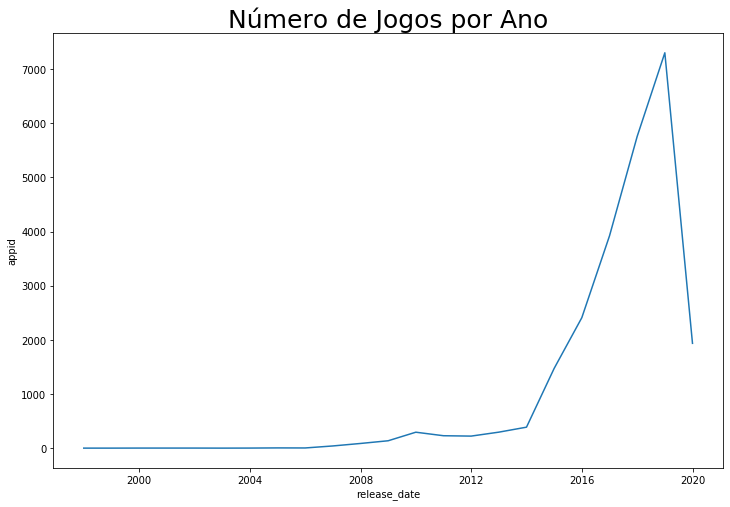

In [26]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,10))

sns.lineplot(x = Data_withou_freePrice.resample('y').mean().index, y =Data_withou_freePrice.resample('y').mean().price, ax = ax1);
sns.lineplot(x = Data_withou_freePrice.resample('y').mean().index, y =Data_withou_freePrice.resample('y').sum().price, ax = ax2);

ax1.set_title('Media do Preço dos Jogos', size = 25)
ax2.set_title('Soma do Preço dos Jogos', size = 25)
fig = plt.figure(figsize = (12,8))

sns.lineplot(x = Data_withou_freePrice.resample('y').mean().index, y = Data_withou_freePrice.resample('y').sum().appid);

plt.title('Número de Jogos por Ano' , fontsize=25);

O comportamento dos Generos dos Jogos seguem o mesmo padrão da quantidade de jogos por ano, tendo uma variação entre 2012 até 2016 mas nada fora do normal.

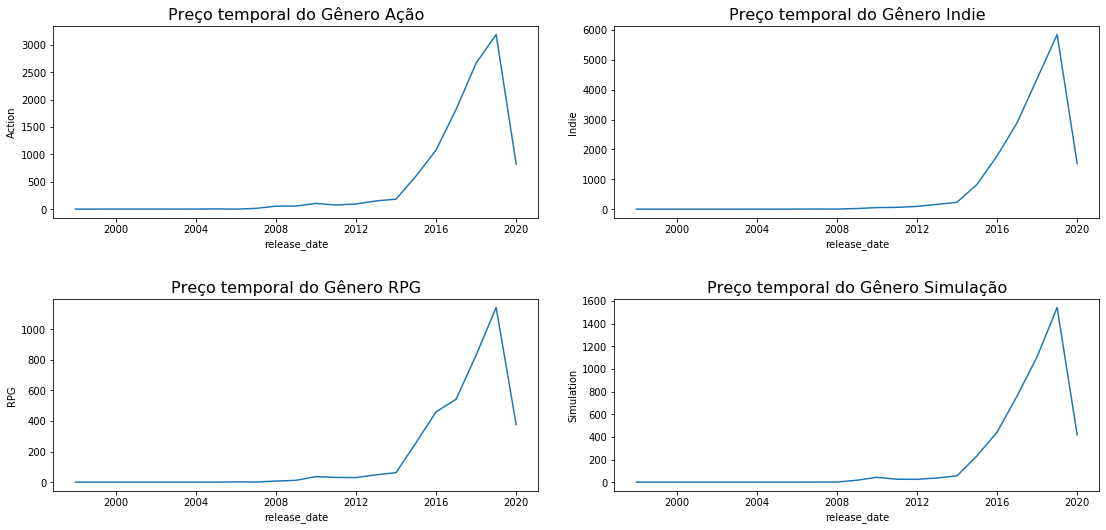

In [83]:
f, axis = plt.subplots(2,2, figsize=(16,8))

sns.lineplot(x = Data_withou_freePrice.resample('y').mean().index,y = Data_withou_freePrice.resample('y').sum().Action, ax = axis[0,0]);
sns.lineplot(x = Data_withou_freePrice.resample('y').mean().index,y = Data_withou_freePrice.resample('y').sum().Indie, ax = axis[0,1]);
sns.lineplot(x = Data_withou_freePrice.resample('y').mean().index,y = Data_withou_freePrice.resample('y').sum().RPG, ax = axis[1,0]);
sns.lineplot(x = Data_withou_freePrice.resample('y').mean().index,y = Data_withou_freePrice.resample('y').sum().Simulation, ax = axis[1,1]);

axis[0,0].set_title("Preço temporal do Gênero Ação" ,size = 16);
axis[0,1].set_title("Preço temporal do Gênero Indie" ,size = 16);
axis[1,0].set_title("Preço temporal do Gênero RPG" ,size = 16);
axis[1,1].set_title("Preço temporal do Gênero Simulação" ,size = 16);

f.tight_layout(pad = 3)

# Dividindo em jogos de graça e pagos

Uma das vantagens da Steam é ter diferentes jogos sem precisar pagar nada, jogos de grandes desenvolvedoras como Valve - Dota 2 e CS até desenvolvedoras com jogos unicos Grinding Gear Games - Path of exile. Por isso vamos dividir em dois conjuntos de dados os jogos gratuitos e os pagos para analisar.

In [28]:
Data_copy =  New_data.copy()

In [29]:
BinariePrice = []
for value in Data_copy.price.values:
    if value == 0:
        BinariePrice.append(1)
    else:
        BinariePrice.append(0)
        
OwnerMax = []
for i in range(0,len(Data_copy.owners.values)):
    OwnerMax.append(int(Data_copy.owners.values[i].split('-')[1]))
    

Data_copy['Free'] = BinariePrice
Data_copy['owners'] = OwnerMax

Quando investigamos a coluna de owners, ele esta com um intervalo de possivel numero de pessoas que tem o jogo, por isso separei e peguei o valor maximo para trabalhar. Foi criado uma coluna chamado Free onde 0 = é o jogo de graça e 1 = jogo pago.

Fazendo o boxplot da avaliação calculado anteriormente, conseguimos ver que o jogo pago tem uma menor variação e com a media menor do que os jogos de graça, alem disso tem uma amplitude maior do que os jogos pagos. Tendo em vista que essa coluna pode nos auxiliar para fazer o algoritmo machine learning.

Text(0, 0.5, 'Avaliação Geral')

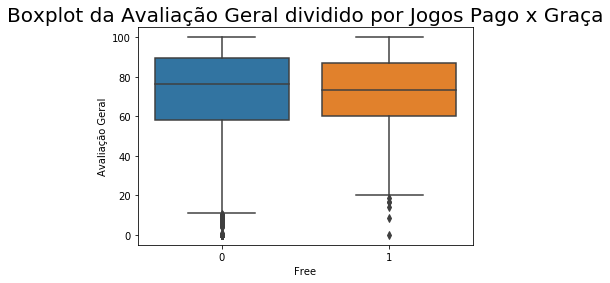

In [85]:
#f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,10))

sns.boxplot(y = Data_copy['Percentage_of_positive_ratings'],x =Data_copy['Free']);
plt.title("Boxplot da Avaliação Geral dividido por Jogos Pago x Graça", size = 20);
plt.ylabel("Avaliação Geral");

In [31]:
import statistics
statistics.median(Data_copy['owners'].values)

20000

Vamos novamente dividir nossos dados, agora em relação ao numero de proprietario dos jogos.

In [32]:
BinarieOwners = []
for value in Data_copy.owners.values:
    if value > 20000:
        BinarieOwners.append(1)
    else:
        BinarieOwners.append(0)
        
Data_copy['Higher20000'] = BinarieOwners

Refazendo o boxplot, podemos notar para jogos com menos de 20000 donos tem jeito parecido do boxplot passado. Quando olhamos para os jogos com proprietarios acima de 20.000 temos que a amplitude de jogos pagos é maior relacionado com os de graça, com média menor tambem. Dessa forma temos que jogos com mais donos tem uma menor variabilidade em relação as avaliações.

Text(0, 0.5, 'Avaliação Geral')

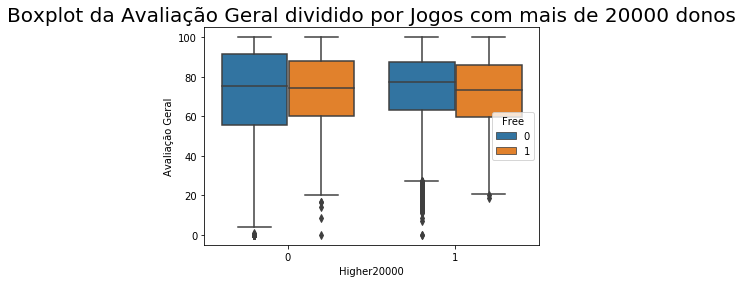

In [86]:
sns.boxplot(y = Data_copy['Percentage_of_positive_ratings'],x =Data_copy['Higher20000'] ,hue =Data_copy['Free']);
plt.title("Boxplot da Avaliação Geral dividido por Jogos com mais de 20000 donos", size = 20);
plt.ylabel("Avaliação Geral");

In [34]:
print('Quantidade de jogos com menos de 20.000 donos:',Data_copy[Data_copy.Higher20000 == 0].shape[0])
print('Quantidade de jogos com mais de 20.000 donos:',Data_copy[Data_copy.Higher20000 == 1].shape[0])

Quantidade de jogos com menos de 20.000 donos: 18596
Quantidade de jogos com mais de 20.000 donos: 8479


Vamos plotar para ver como fica as distribuiçoes dos generos quando separamos o conjunto de dados por quantidade de proprietarios. Conseguimos notar que a proporção entre os generos não muda tanto mesma dentro da divisão, não existindo um genero especifico para jogos de graça e jogos pagos.

In [35]:
Data_Higher20000 = Data_copy[Data_copy.Higher20000 == 1]
Data_Less20000  = Data_copy[Data_copy.Higher20000 == 0]

Number_GenreHigh = []
Number_GenreLess = []

for genr in Name_genres:
    Number_GenreHigh.append(Data_Higher20000[Data_Higher20000[genr] == 1].shape[0])
    Number_GenreLess.append(Data_Less20000[Data_Less20000[genr] == 1].shape[0])

Number_GenreHigh = (np.array(Number_GenreHigh)/sum(Number_GenreHigh))*100    
Number_GenreLess = (np.array(Number_GenreLess)/sum(Number_GenreLess))*100

Aux_Data = pd.DataFrame([Name_genres,Number_GenreHigh,Number_GenreLess])
Aux_Data = Aux_Data.T
Aux_Data = Aux_Data.set_index(0)
Aux_Data["Genres"] = Name_genres
Aux_Data.columns = ['High_20000','Less_20000','Genres']
Aux_Data = Aux_Data.sort_values('High_20000',ascending = False)

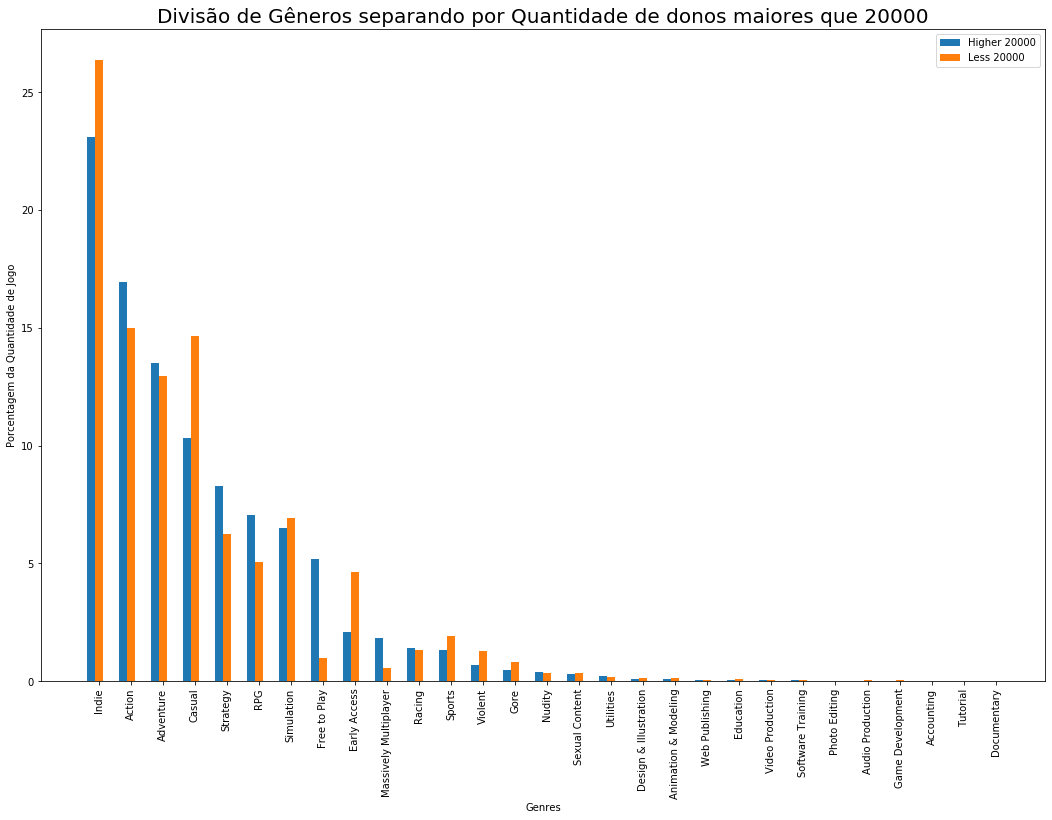

In [87]:
import matplotlib.pyplot as plt
f = plt.figure(figsize = (18,12))

barWidth = 0.25
X1 = np.arange(len(Name_genres))
X2 = [x + barWidth for x in X1]
              
plt.bar(X1,Aux_Data.High_20000, width =  barWidth, label='Higher 20000');
plt.bar(X2 ,Aux_Data.Less_20000, width =  barWidth, label='Less 20000');

plt.xlabel('Genres')

plt.xticks(X2,Aux_Data.Genres.values , rotation=90);
#plt.xlabel((Aux_Data.Genres))
plt.title("Divisão de Gêneros separando por Quantidade de donos maiores que 20000", size = 20);
plt.ylabel("Porcentagem da Quantidade de Jogo")
plt.legend()
plt.show()

Vamos tentar ver se existe alguma diferença na varianção dos generos indie action, adventure e casual fazendo o teste anova.

# Distribuição das Avaliações

Com os dados divididos em quantidade de proprietarios de jogos, podemos ver a distribuição das avaliações. Pela plotagem conseguimos notar que os dois se assemelham porem com algumas pontos distintos, sendo os dois assimetricos para a esquerda logo é uma assimetria positiva ja sabemos então que a média é maior que a mediana. Podemos fazer um teste de hipotese para ver se as duas distribuições tem diferença entre elas, com isso é perceptivel que essas distribuições não seguem uma distribuição Gaussiana teremos que usar um teste não parametrico para fazer o teste.

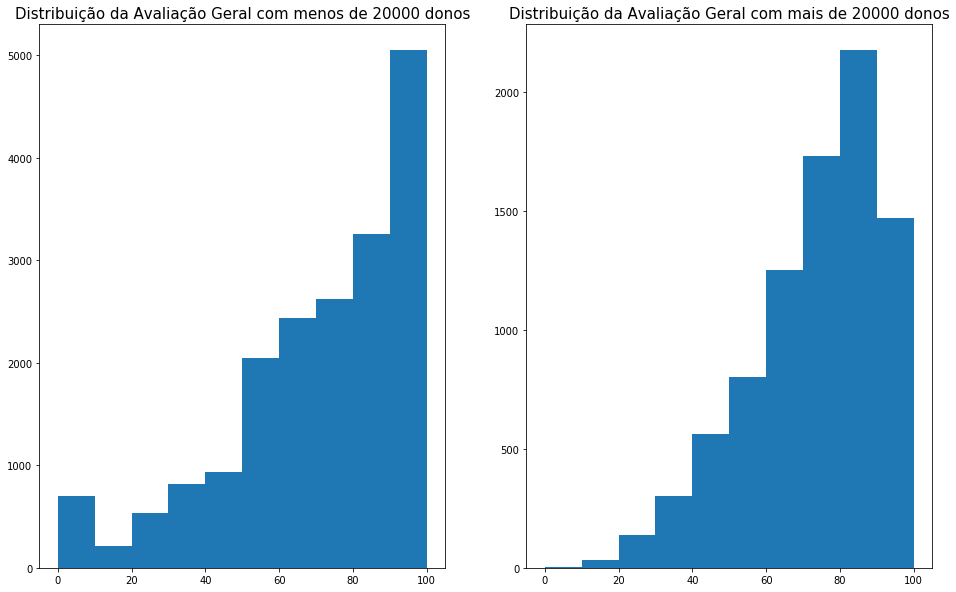

In [89]:
fig, axi1 = plt.subplots(1,2, figsize = (16,10))

axi1[0].hist(Data_copy[Data_copy.Higher20000 == 0].Percentage_of_positive_ratings);
axi1[1].hist(Data_copy[Data_copy.Higher20000 == 1].Percentage_of_positive_ratings);

axi1[0].set_title("Distribuição da Avaliação Geral com menos de 20000 donos",size = 15);
axi1[1].set_title("Distribuição da Avaliação Geral com mais de 20000 donos",size = 15);

O teste que vamos realizar é o teste de Mann Whitney U (https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php) é utilizado para mediar se a mediana é parecida. Com isso temos que

H0 é que as duas distribuições tem mesma medianas

H1 é que as duas distribuições tem medianas distintas.

Vamos operar em relação a alpha = 0.05, analisando o resultado temos que o teste falhou em rejeitar H0, com isso temos que as medianas não são diferentes, mostrando a similaridade edas distribuiçoes.

In [38]:
from scipy.stats import mannwhitneyu
data1 = Data_copy[Data_copy.Higher20000 == 1].Percentage_of_positive_ratings
data2 = Data_copy[Data_copy.Higher20000 == 0].Percentage_of_positive_ratings
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=77999140.000, p=0.080
Same distribution (fail to reject H0)


Realizando o mesmo processo anteriormente, vamos ver a distribuição de 4 generos dentro do conjunto de dados maior que 20000 donos,e novamente vemos uma distribuição assimetrica a esquerda, tirando o genero estrategia todos parecem seguir o mesmo padrão. Vamos realizar um teste para ver se eles tem a mesa variancia.

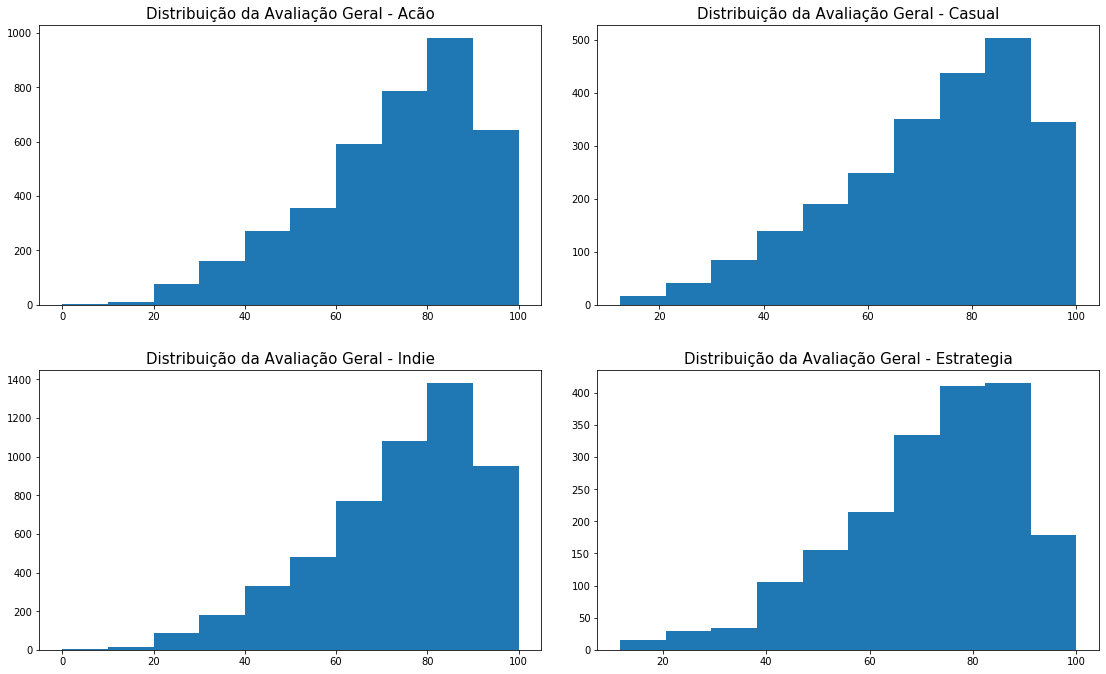

In [91]:
fig, axi1 = plt.subplots(2,2, figsize = (16,10))

axi1[0,0].hist(Data_copy[Data_copy.Higher20000 == 1][Data_copy['Action'] == 1].Percentage_of_positive_ratings);
axi1[0,1].hist(Data_copy[Data_copy.Higher20000 == 1][Data_copy['Casual'] == 1].Percentage_of_positive_ratings);
axi1[1,0].hist(Data_copy[Data_copy.Higher20000 == 1][Data_copy['Indie'] == 1].Percentage_of_positive_ratings);
axi1[1,1].hist(Data_copy[Data_copy.Higher20000 == 1][Data_copy['Strategy'] == 1].Percentage_of_positive_ratings);

axi1[0,0].set_title("Distribuição da Avaliação Geral - Acão",size = 15);
axi1[0,1].set_title("Distribuição da Avaliação Geral - Casual",size = 15);
axi1[1,0].set_title("Distribuição da Avaliação Geral - Indie",size = 15);
axi1[1,1].set_title("Distribuição da Avaliação Geral - Estrategia",size = 15);

fig.tight_layout(pad = 3)

Para fazer o teste vamos utilizar o teste Kruskal–Wallis, que se assemelha com o teste ANOVA, podendo fazer para mais de um conjunto de dados e podendo verificar se existe uma diferença significante entres os dados (https://statistics.laerd.com/spss-tutorials/kruskal-wallis-h-test-using-spss-statistics.php), caso falhe o teste ele não nos mostra qual é a coluna que não se assemelha ,para isso temos que usar o teste Dunn para descobrir (https://www.statisticshowto.com/dunns-test/)

H0 é que todas as distribuições tem mesma medianas

H1 é que as distribuições tem medianas distintas.

Utilizando alpha sendo 0.05, vimos que rejeitamos H0, realizando o teste de Dunn percebemos que apenas os Generos Action e Casual são parecidos, as demais não.

In [40]:
from scipy.stats import kruskal
import scikit_posthocs as sp

data1 = Data_copy[Data_copy.Higher20000 == 1][Data_copy['Action'] == 1].Percentage_of_positive_ratings
data2 = Data_copy[Data_copy.Higher20000 == 1][Data_copy['Casual'] == 1].Percentage_of_positive_ratings
data3 = Data_copy[Data_copy.Higher20000 == 1][Data_copy['Indie'] == 1].Percentage_of_positive_ratings
data4 = Data_copy[Data_copy.Higher20000 == 1][Data_copy['Strategy'] == 1].Percentage_of_positive_ratings
stat, p = kruskal(data1, data2, data3 ,data4)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
x = [data1,data2,data3,data4]
sp.posthoc_dunn(x, p_adjust = 'holm')    

Statistics=28.700, p=0.000
Different distribution (reject H0)


,1,2,3,4
1,-1.000000,0.940124,0.008588,0.039100
2,0.940124,-1.000000,0.037483,0.040715
3,0.008588,0.037483,-1.000000,0.000002
4,0.039100,0.040715,0.000002,-1.000000


Repetindo o processo para os dados menores de 20000 donos, e temos o resultado pior que o anterior, temos que agora nenhuma das colunas se assemelham.

Text(0.5, 0.98, 'A distribuição das Avaliação dos Generos dos jogos (Jogos abaixo de 20000 proprietarios)')

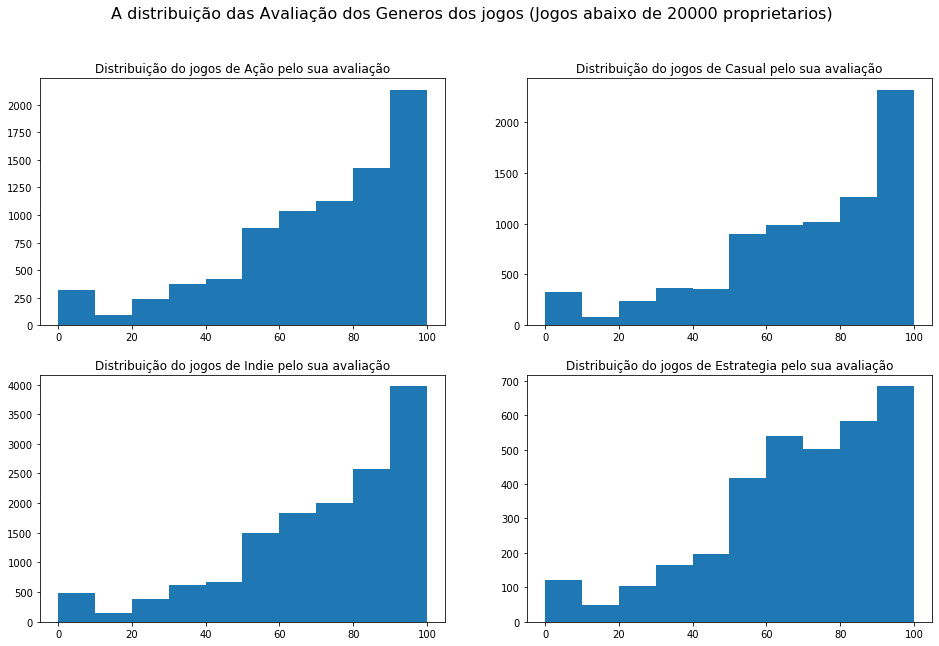

In [41]:
fig, axi1 = plt.subplots(2,2, figsize = (16,10))

axi1[0,0].hist(Data_copy[Data_copy.Higher20000 == 0][Data_copy['Action'] == 1].Percentage_of_positive_ratings);
axi1[0,1].hist(Data_copy[Data_copy.Higher20000 == 0][Data_copy['Casual'] == 1].Percentage_of_positive_ratings);
axi1[1,0].hist(Data_copy[Data_copy.Higher20000 == 0][Data_copy['Indie'] == 1].Percentage_of_positive_ratings);
axi1[1,1].hist(Data_copy[Data_copy.Higher20000 == 0][Data_copy['Strategy'] == 1].Percentage_of_positive_ratings);

axi1[0,0].set_title("Distribuição do jogos de Ação pelo sua avaliação")
axi1[0,1].set_title("Distribuição do jogos de Casual pelo sua avaliação")
axi1[1,0].set_title("Distribuição do jogos de Indie pelo sua avaliação")
axi1[1,1].set_title("Distribuição do jogos de Estrategia pelo sua avaliação")

fig.suptitle('A distribuição das Avaliação dos Generos dos jogos (Jogos abaixo de 20000 proprietarios)', fontsize=16)

In [42]:
from scipy.stats import kruskal

data1 = Data_copy[Data_copy.Higher20000 == 0][Data_copy['Action'] == 1].Percentage_of_positive_ratings
data2 = Data_copy[Data_copy.Higher20000 == 0][Data_copy['Casual'] == 1].Percentage_of_positive_ratings
data3 = Data_copy[Data_copy.Higher20000 == 0][Data_copy['Indie'] == 1].Percentage_of_positive_ratings
data4 = Data_copy[Data_copy.Higher20000 == 0][Data_copy['Strategy'] == 1].Percentage_of_positive_ratings
stat, p = kruskal(data1, data2, data3 ,data4)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
x = [data1,data2,data3,data4]
sp.posthoc_dunn(x, p_adjust = 'holm')

Statistics=86.103, p=0.000
Different distribution (reject H0)


,1,2,3,4
1,-1.000000e+00,1.507015e-01,3.376438e-03,1.255993e-09
2,1.507015e-01,-1.000000e+00,2.192657e-01,1.092151e-13
3,3.376438e-03,2.192657e-01,-1.000000e+00,5.158747e-19
4,1.255993e-09,1.092151e-13,5.158747e-19,-1.000000e+00


Fazendo a comparação entre o genero Action dos conjuntos trabalhados, podemos perceber visualmente uma distribuição parecida, quando feito o teste de Mann Whitney U para 

H0 é que as duas distribuições tem mesma medianas

H1 é que as duas distribuições tem medianas distintas.

Vamos operar em relação a alpha = 0.05, analisando o resultado temos que o teste falhou em rejeitar H0, com isso temos que as medianas não são diferentes, mostrando a similaridade edas distribuiçoes. Com isso temos que para o genero Action

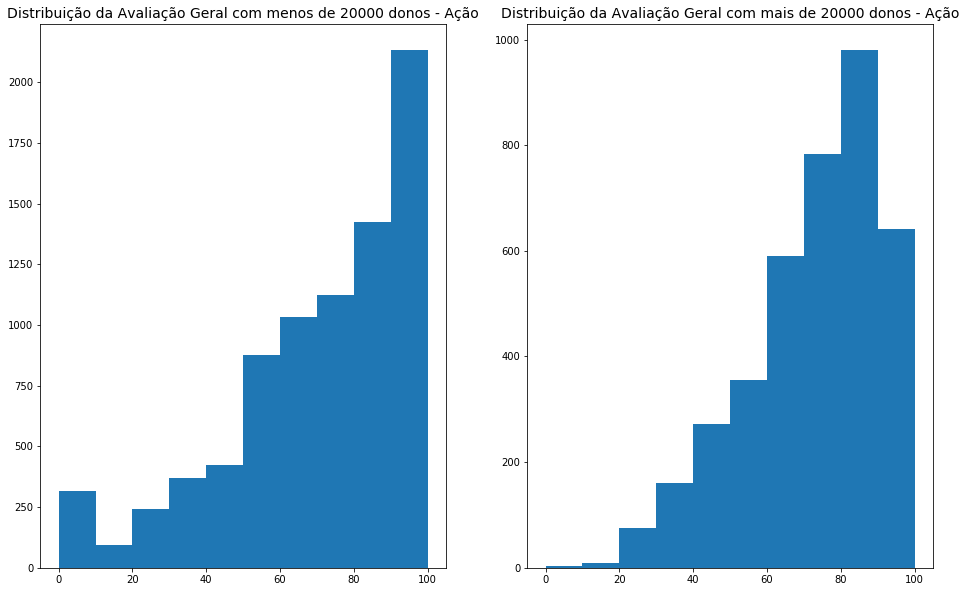

In [92]:
fig, axi1 = plt.subplots(1,2, figsize = (16,10));

axi1[0].hist(Data_copy[Data_copy.Higher20000 == 0][Data_copy['Action'] == 1].Percentage_of_positive_ratings);
axi1[1].hist(Data_copy[Data_copy.Higher20000 == 1][Data_copy['Action'] == 1].Percentage_of_positive_ratings);

axi1[0].set_title("Distribuição da Avaliação Geral com menos de 20000 donos - Ação",size = 14);
axi1[1].set_title("Distribuição da Avaliação Geral com mais de 20000 donos - Ação",size = 14);

In [44]:
from scipy.stats import mannwhitneyu
data1 = Data_copy[Data_copy.Higher20000 == 0][Data_copy['Action'] == 1].Percentage_of_positive_ratings
data2 = Data_copy[Data_copy.Higher20000 == 1][Data_copy['Action'] == 1].Percentage_of_positive_ratings

stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=15276058.000, p=0.064
Same distribution (fail to reject H0)


Analisando rapidamente a coluna Steampy_tag, que é a coluna que coloca um rotulo nos jogos, podendo apresentar mais de um, muitas vezes com rotulos unicos para que os jogos parecidos tenham tags parecidas e é com essa coluna que iremos trabalhar para fazer o nosso sistema de recomendação.

In [55]:
total_games_tag = Data_Steam.steamspy_tags.str.get_dummies(";").sum()
print("Quantidade de tags feito pela Steam é de ",len(total_games_tag))
print(total_games_tag.sort_values()[0:20])

Quantidade de tags feito pela Steam é de  339
Sailing                              1
Parody                               1
Spectacle fighter                    1
Nonlinear                            1
NSFW                                 1
Conversation                         1
Mystery Dungeon                      1
Stylized                             1
Music-Based Procedural Generation    1
Movie                                1
Blood                                1
Cinematic                            1
Mod                                  1
Logic                                1
Perma Death                          1
Diplomacy                            1
Kickstarter                          1
Investigation                        1
Inventory Management                 1
3D Vision                            1
dtype: int64


Text(0.5, 1.0, 'Maiores Tags na Steam')

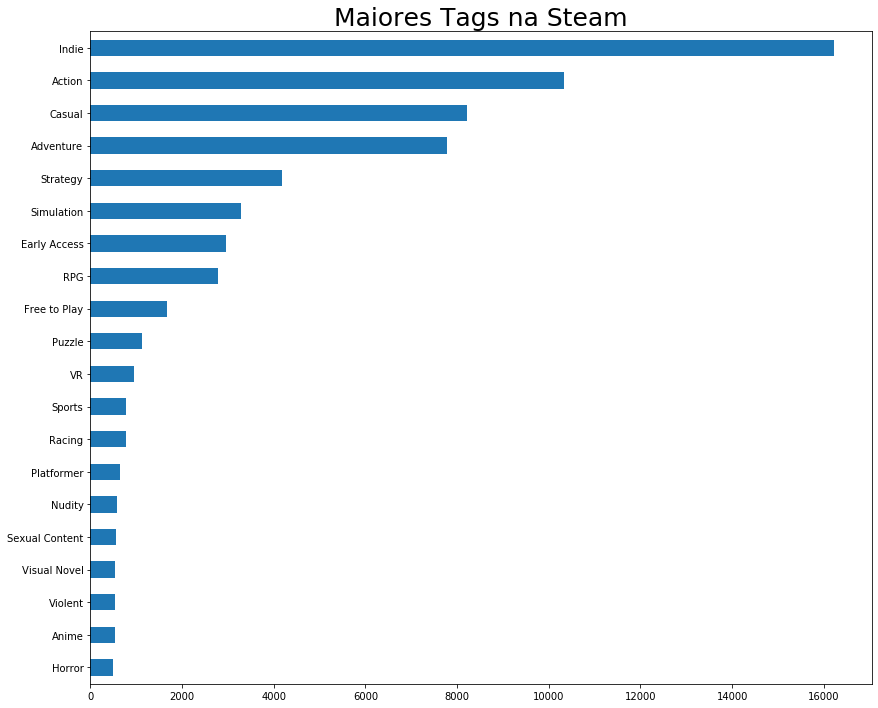

In [94]:
#total_games_tag.sort_values(ascending = False)[0:20]
total_games_tag.sort_values(ascending = False)[0:20].sort_values().plot.barh(figsize = (14,12));
plt.title("Maiores Tags na Steam", size = 25)

# Conclusão Parte 1

- Analisamos inicialmente quais os generos com maior quantidade de jogos, chegamos que Indie e Action estão disparados, porém quando calculamos as medias dos preços e medias do tempo jogados eles não ficam no topo, os jogos mais caros são os "educativos" e o genero mais jogado é o Massivly Multiplayer (MM).
- Plotamos as avaliações positivas por avaliações negativos do generos e vimos que a maioria dos jogos tem mais avaliações positivas, porém MM é disparado o genero com mais avaliações porem tem uma as avaliações se dividem em boas e ruins. E por criamos uma avaliação baseada nas avaliações positivas e negativas feitas
- Demos uma olhada nos maiores desenvolvedores e se existia alguma correlação entre o preço e as avaliações, porém nao encontramos nada.
- Separamos os dados em jogos pagos e de graça, olhando a evolução dos jogos pagos, conseguimos ver uma crescente após o ano de 2013, assim como na produção dos jogos em gerais (os generos seguem a mesma crescente).
- Com o nosso conjuntos de dados divididos em jogos de graça e pagos, vimos o boxplot para ver a variancia e amplitude, mostrando que jogos pagos tem uma amplitude menor porém e variancia menor tambem quando vemos a avaliação geral. Após dividimos novamente o nosso dado em maiores e menores de 20000 donos, repetimos o processo do boxplot, e percebemos que para jogos com mais de 20000 donos os jogos de graça tem uma avaliação melhor e menor variabilidade.
- Nessa ultima parte vimos algumas comparações de distribuições, analisamos as distribuiçoes entres os generos para os dois casos e vimos que sua frequencia não são as mesma, porém quando pegamos as avaliações em geral divididas pelo número de donos eles tem a mesma mediana. Testes estatisticos são importante pois podemos utiliza-los para selecionar as features mais importantes na hora de fazer machine learning, assim como comparar resultados de modelos para ver se comportam da mesma maneira, nesse caso foi para ver se existia uma diferença trabalhar com os dados acima de 20000 donos ou não.

Nessa parte eu tentei apenas fazer um overview sobre o nosso conjunto de dados, agora vou começar a construção do nosso sistema de recomendação